In [75]:
import numpy as np
import matplotlib.pyplot as plt

import pyharm
import pyharm.plots.plot_dumps as pplt
import pyharm.plots.overlays as ovl

# Suppress warnings, to avoid math warnings for /0 or sqrt(-)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [76]:
# dump = pyharm.load_dump("SANE_a+0.94_288_0900_MKS.h5")
dump = pyharm.load_dump("/home/zzl/kx-4t/kharma/output/20240826_cuda_mad_a09375_192-96-96_PATOKA/torus.out0.00100.phdf")

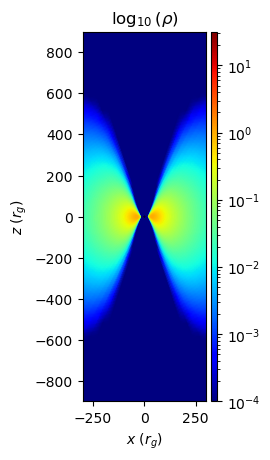

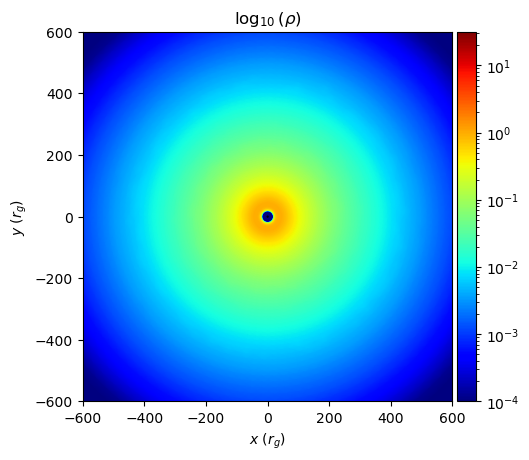

In [77]:
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_rho', vmin=-4, vmax=1.5, window=(-300,300,-900,900))
pplt.overlay_contours(ax, dump, 'sigma', (1.0,), color='r')
fig, ax = plt.subplots(1,1)
pplt.plot_xy(ax, dump, 'log_rho', vmin=-4, vmax=1.5, window=(-600,600,-600,600))

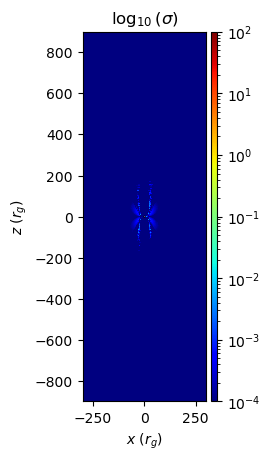

In [78]:
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_sigma', vmin=-4, vmax=2, window=(-300,300,-900,900), shading='flat')

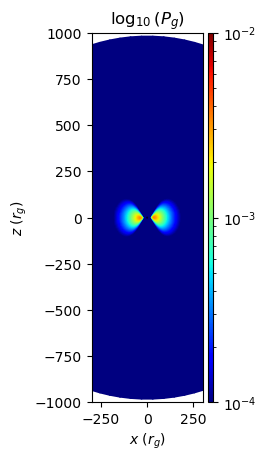

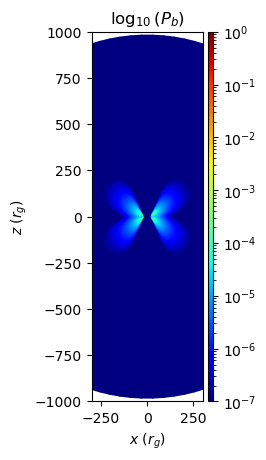

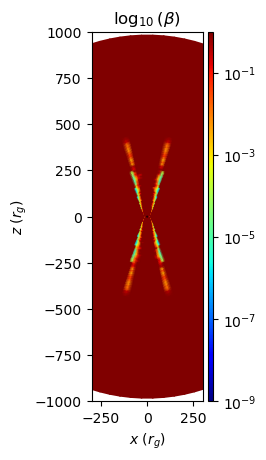

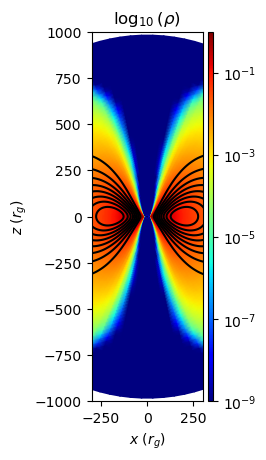

In [79]:
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_Pg', vmin=-4, vmax=-2, window=(-300,300,-1000,1000))
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_Pb', vmin=-7, vmax=0, window=(-300,300,-1000,1000))
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_beta', vmin=1e-9, vmax=1e-0, window=(-300,300,-1000,1000))
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_rho', vmin=1e-9, vmax=1e-0, window=(-300,300,-1000,1000))
ovl.overlay_field(ax,dump, nlines=5)

In [80]:
print("Pg.max = ",dump['Pg'][:,:,0].max())
print("Pb.max = ",dump['Pb'][:,:,0].max())
print("beta.min = ",dump['beta'][:,:,0].min())
print("sigma.max = ",dump['sigma'][:,:,0].max())


Pg.max =  0.0032634551391620193
Pb.max =  0.000146130255519204
beta.min =  8.216430776654714e-07
sigma.max =  0.009893294781915687


In [81]:
0.5 * pyharm.shell_sum(dump, 'abs_B1', at_i=5) / np.sqrt(np.abs(pyharm.shell_sum(dump, 'FM', at_i=5)))

0.007194526984492886

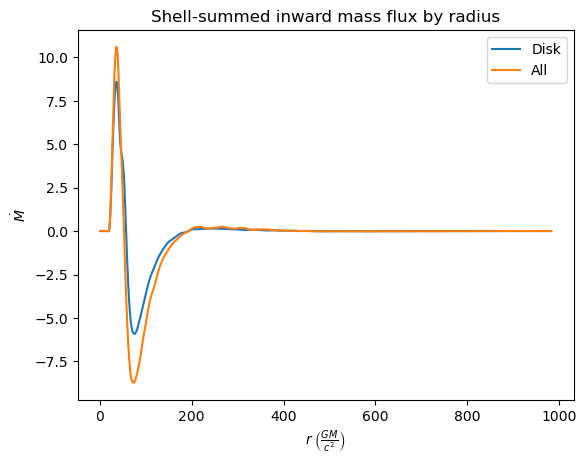

In [82]:
plt.plot(dump['r1d'], -pyharm.shell_sum(dump, 'FM', th_slice=(5*np.pi/12, 7*np.pi/12)), label="Disk")
plt.plot(dump['r1d'], -pyharm.shell_sum(dump, 'FM'), label="All")
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.xlabel(pyharm.pretty('r'))
plt.ylabel(pyharm.pretty('Mdot'))
plt.title(r"Shell-summed inward mass flux by radius")
plt.legend()

The shell-averaged azimuthal velocity as a function of radius is much more stable:

Note the variable 'u^phi' -- this is the phi component of the 4-velocity in Kerr-Schild coordinates, not Modified Kerr-Schild Coordinates.  That is, pyharm has converted 'ucon' to straight KS ('ucon_base'), and this is the phi component of that converted 4-vector. One can equivalently write dump['ucon_base'][3], as shown.

This convention is a convenient way to get the MHD stress-energy tensor: just ask for 'T^mu_nu' (or use 'TEM' or 'TFl' to get just the E&M or fluid pieces).  The Maxwell tensor F is also supported.

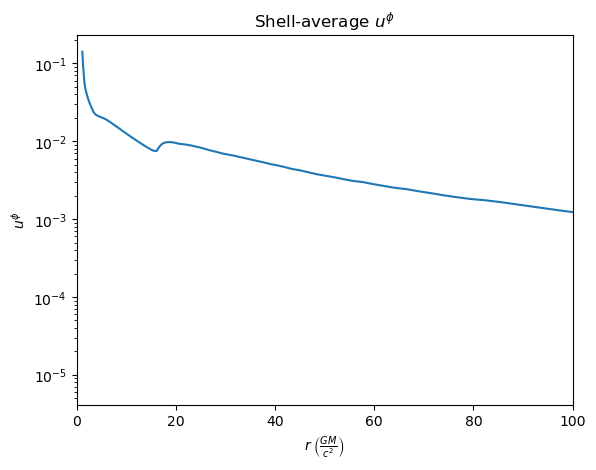

True
[[[4.87281329e-07]]]


In [83]:
plt.plot(dump['r1d'], pyharm.shell_avg(dump, 'u^phi'))
plt.xlim(0,100)
plt.yscale('log')
plt.xlabel(pyharm.pretty('r'))
plt.ylabel(pyharm.pretty('u^phi'))
plt.title(r"Shell-average $u^{\phi}$")
plt.show()

print(np.all(dump['u^phi'] == dump['ucon_base'][3]))

# Total energy, for example
print(-dump[11,11,11]['T^0_0'])

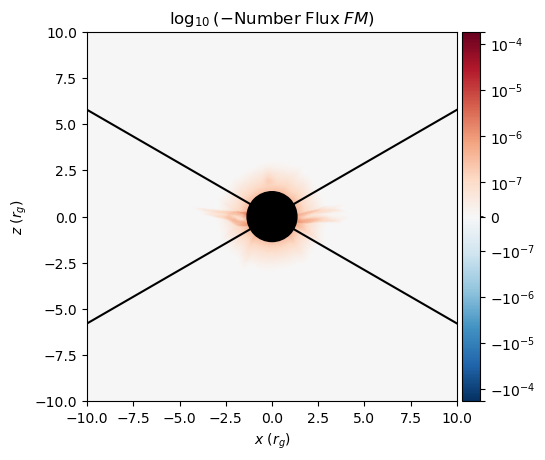

Accreted within disk: 8.2273829852363e-06
Total accreted: 1.5815678497924545e-05
Percentage: 52.02042382384013


In [84]:
fig, ax = plt.subplots(1,1)
pplt.plot_xz(ax, dump, 'log_neg_FM', window=[-10,10,-10,10])
pplt.overlay_contours(ax, dump, 'th', [np.pi/3, 2*np.pi/3])
plt.show()

in_disk = -pyharm.shell_sum(dump, 'FM', at_i=5, th_slice=(np.pi/3, 2*np.pi/3))
total = -pyharm.shell_sum(dump, 'FM', at_i=5)

print("Accreted within disk:", in_disk)
print("Total accreted:", total)
print("Percentage:",in_disk/total*100)
